In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from kuramoto import *


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [28]:
# Set up model parameters 
epsilon = 1
gamma = 0.4
sigma = 0.1
mean_omega = 0.5

# Set up simulation parameters 
L = 128 # size of the system 
T = 5e2 # total time of the simulation 
dt = 1e-2 # time step 
n_batches = T # number of time points recorded in the end 

A = np.random.rand(L, L)
A = (A + A.T)/2
np.fill_diagonal(A, 0) 


network_matrix = (A>0.97).astype('float')

print('number of points with branches')
print(np.sum(network_matrix, axis=0))


# Initialise the model and run the simulation 
model = KuramotoNetwork(epsilon, gamma, sigma, mean_omega, BC='fixed')
model.initialise(L, T, dt, n_batches, network_matrix)
model.evolve(verbose=False) # this runs the simulation, set verbose to True to see output at every time step 

number of points with branches
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 3. 1. 0. 0. 0. 0. 0. 0.]


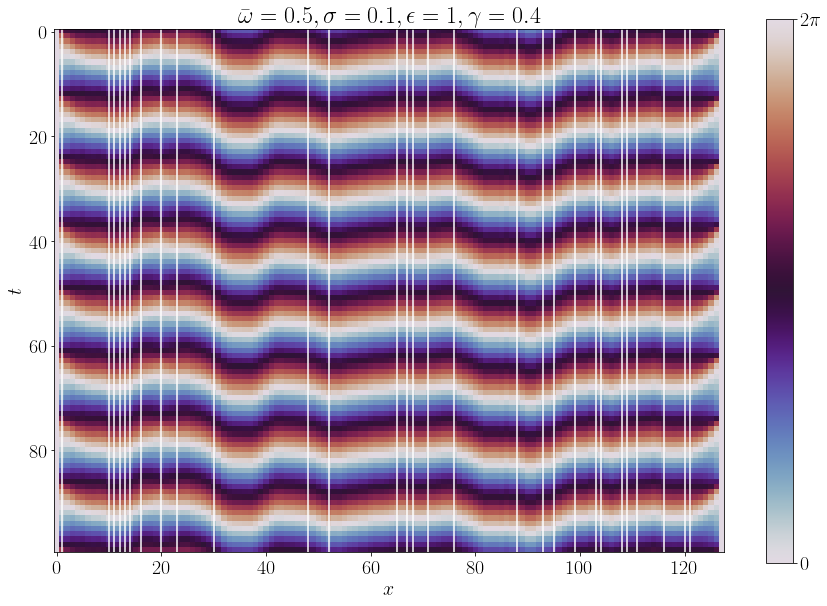

In [29]:
plt.figure(figsize=(15, 10))
plt.rc('font', size=20)
plt.rc('text', usetex=True)
im = plt.imshow(model.res[-100:] % (np.pi*2), cmap='twilight', vmin=0, vmax=2*np.pi)
cbar = plt.colorbar(im)
for (x, v) in enumerate(np.sum(network_matrix, axis=0)):
    if v > 0: # it's a branch point
        plt.axvline(x=x,color='white')

        
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi$'])
plt.title(r'$\bar{{\omega}}={}, \sigma={}, \epsilon ={}, \gamma ={}$'.format(mean_omega, sigma, epsilon, gamma))
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
plt.show() 